<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/BeltExam1AML_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [2]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import missingno as msno
import numpy as np
import gc

sns.set_theme()


## **Librerias Machine Learning**

In [3]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.model_selection import train_test_split       # Para dividir las pruebas


# PARA OBTENER METRICAS

from sklearn.metrics          import roc_auc_score, plot_roc_curve ,accuracy_score



import tensorflow as tf
from   tensorflow.keras import layers, models

from sklearn.preprocessing import  StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.decomposition   import PCA


Se debe cargar archivo **CleanDataDataframe.py**

In [4]:
import  CleanDataDataframe as cdd 


# **Carga de Datos**

In [5]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df




In [6]:
filename = 'train.csv'    

df = CargaDatos(filename)
df.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Información de los Datos**


In [7]:
df.head() 

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, letter to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


# **Verificar Datos Nulos isna**

In [9]:
df.isna().sum()

letter    0
0.1       0
0.2       0
0.3       0
0.4       0
         ..
0.644     0
0.645     0
0.646     0
0.647     0
0.648     0
Length: 785, dtype: int64

# **Verificar Datos Duplicados**

In [10]:
df.duplicated().sum()

109802

In [11]:
df[df.duplicated()]

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297953,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297955,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
letter,297960.0,13.532424,6.739381,0.0,10.0,14.0,18.0,25.0
0.1,297960.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.2,297960.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.3,297960.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.4,297960.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
0.644,297960.0,0.000084,0.038905,0.0,0.0,0.0,0.0,21.0
0.645,297960.0,0.000503,0.207410,0.0,0.0,0.0,0.0,103.0
0.646,297960.0,0.000688,0.362959,0.0,0.0,0.0,0.0,198.0
0.647,297960.0,0.000275,0.150222,0.0,0.0,0.0,0.0,82.0


In [13]:
df.shape

(297960, 785)

## **Preparación,Análisis y Limpieza de Datos**

In [14]:
data = cdd.AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,letter,297960,0,0,0.0,int64,297960.0,0.0
1,0.1,297960,0,0,0.0,int64,297960.0,0.0
2,0.2,297960,0,0,0.0,int64,297960.0,0.0
3,0.3,297960,0,0,0.0,int64,297960.0,0.0
4,0.4,297960,0,0,0.0,int64,297960.0,0.0
...,...,...,...,...,...,...,...,...
780,0.644,297960,0,0,0.0,int64,297960.0,0.0
781,0.645,297960,0,0,0.0,int64,297960.0,0.0
782,0.646,297960,0,0,0.0,int64,297960.0,0.0
783,0.647,297960,0,0,0.0,int64,297960.0,0.0


In [15]:
cdd.ShowDataFieldsNoNumber(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [16]:
cdd.ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


# **Proceso depuración Datos**


## **Datos no number**

In [17]:
cont = 0
contador_datos = 0

for index in data.index:
  if data['Numbers'][index] >0 and data['NoNumbers'][index] >0:
    contador_datos += 1
    df_NoNumber =  cdd.ShowNumber(df ,data['Field'][index], False ) 
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    print(f" field = '{data['Field'][index]}' ")
    
    if cont == 0:
      df_NoNumber = ( cdd.ShowNumber(df ,data['Field'][index], False ) )
    else:
      df_NoNumber = pd.merge( df_NoNumber , (cdd.ShowNumber(df ,data['Field'][index], False ))  )
    
    cont += 1

if contador_datos>0:
  df_NoNumber

### **Variables para Procesos de datos**

In [18]:
#Habilitar Estas variables para realizar una acción

bEliminaColumnaNaN = False
bEliminaFilasNaN   = False

bCambiaTipoDato    = False
bActualizaColumna  = False



# **Actualiza una fila especifica**

In [19]:
if bActualizaColumna == True:
  
  filtro = cdd.ShowNumber(df ,'<Campo a Actualizar>', False, True )
  df.loc[ filtro == False  , ['<Campo a Actualizar>']] = 27 #Valor a reemplazar Numerico ó No
  df[filtro == False]


# **Cambiando TipoDato de Columna**

In [20]:
if bCambiaTipoDato == True:
  df = cdd.CambiaTipoDatoDF(df , '<campo>' , 'int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, letter to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


# **Campos NaN**

In [21]:
#Filtro por los errores en los datos
cdd.ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [22]:
#def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):
cont = 0
contador_datos = 0

for index in data.index:
  
  if data['NaN'][index] >0:
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    #print(f" field = '{data['Field'][index]}' ")
    if cont == 0:
      
      #print(f"Ciclo ={cont} field = '{data['Field'][index]}' ")
      df_NaNdf = ( cdd.ShowNaNdf(df ,data['Field'][index] ) )
      #print(df_NaNdf)
    else:
      #print(f"Ciclo ={cont}  merge field = '{data['Field'][index]}' ")
      df_NaNdf_aux = cdd.ShowNaNdf(df ,data['Field'][index])
      #print(df_NaNdf_aux)
      df_NaNdf = pd.merge( df_NaNdf , df_NaNdf_aux , how='outer')  
      contador_datos += 1
    
    cont += 1

if contador_datos > 0 :
  df_NaNdf

# **Eliminando Filas NaN**

In [23]:
if bEliminaFilasNaN == True:
  columns = [] # Colocar nombre de los campos  a eliminar filas entre comillas y separado por coma ['Campo1','Campo2']
  for column in columns:
    print(f"row = {column}")
    filtro_NaN = cdd.ShowNaNdf(df ,column, True)
    df = df[~filtro_NaN]

df

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297955,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297958,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Elimina una o varias columnas**

In [24]:
if bEliminaColumnaNaN == True:
  columns = [] # Colocar las columnas a eliminar entre comillas ''
  for column in columns:
    print(f"column = {column}")
    cdd.EliminaColumnas(df,column) 

df

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297955,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297958,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Manejo de Datos Duplicados**

In [25]:
data_duplicated = df.duplicated()
df[data_duplicated]

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297953,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297955,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Elimina Duplicados**

In [26]:
df.drop_duplicates(keep='last',inplace=True)
df

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297954,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297955,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data = cdd.AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,letter,188158,0,0,0.0,int64,188158.0,0.0
1,0.1,188158,0,0,0.0,int64,188158.0,0.0
2,0.2,188158,0,0,0.0,int64,188158.0,0.0
3,0.3,188158,0,0,0.0,int64,188158.0,0.0
4,0.4,188158,0,0,0.0,int64,188158.0,0.0
...,...,...,...,...,...,...,...,...
780,0.644,188158,0,0,0.0,int64,188158.0,0.0
781,0.645,188158,0,0,0.0,int64,188158.0,0.0
782,0.646,188158,0,0,0.0,int64,188158.0,0.0
783,0.647,188158,0,0,0.0,int64,188158.0,0.0


In [28]:
cdd.ShowDataFieldsNoNumber(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [29]:
cdd.ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [30]:
df.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Siempre Reinicar Indice después de borrar filas antes**

In [31]:
# Reseteando Indices por haber eliminado campos anteriormente
df.reset_index(inplace=True, drop=True)
df

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188153,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188154,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188155,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188156,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188158 entries, 0 to 188157
Columns: 785 entries, letter to 0.648
dtypes: int64(785)
memory usage: 1.1 GB


# **Filtrado de Datos**

In [34]:
# Filtrado de DataFrame

#Condiciones
#filtro_datos_1 = df['Campo1'] == '<CONDICICION>'
#filtro_datos_2 = df['Campo1'] == '<CONDICICION>'

#Filtro final con las condiciones
#filtro_final = ( filtro_datos_1 & filtro_datos_1 )

#df_valores = df[filtro_final] 




In [35]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [36]:
datos_grafos=df.groupby(['letter'])[['letter']].count().copy()
datos_grafos

,letter
letter,
0,7123
1,4462
2,11492
3,5085
4,5680
5,932
6,2990
7,3675
8,841


In [37]:
for ind in datos_grafos.index:
  datos_grafos.loc[ind , "Letra"] = class_names[ind]

datos_grafos.reset_index(inplace=True, drop=True)
datos_grafos  

,letter,Letra
0,7123,A
1,4462,B
2,11492,C
3,5085,D
4,5680,E
5,932,F
6,2990,G
7,3675,H
8,841,I
9,4297,J


# **Gráfico inicial**


In [38]:
plt.figure(dpi=200) #resolución de figura (implica tamaño)
fig = px.bar(datos_grafos, x='Letra', y='letter' , title="Gráfico con visalización Frecuencia de Letras" )
fig.show()  

<Figure size 1200x800 with 0 Axes>

In [39]:
plt.figure(dpi=80) #resolución de figura (implica tamaño)
fig = px.pie(datos_grafos, values = 'letter', names='Letra' , title = 'Proporción de letras')
fig.show()

<Figure size 480x320 with 0 Axes>

Des

In [40]:
fig = px.scatter(datos_grafos, x="Letra", y="letter",
	         size="letter", hover_name="Letra",color="Letra", title="Gráfico con distribución de Letras")
fig.show()

**Obtención de Datos X e y**

In [41]:
df

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188153,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188154,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188155,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188156,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Elimina columnas de df_valores**

In [42]:
# values los deja como arreglo , pero se pueden usar los dataframe Directos, pero existen librerias que solo usan array numpys ojo 

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame

X = df.drop(columns=['letter']).values / 255

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X.shape

(188158, 784)

In [44]:
y = df['letter'].values 
y

array([ 0,  0,  0, ..., 25, 25, 25])

In [45]:
y.shape

(188158,)

# **Aplicación del Algún método**


# **Aplicando PCA**

In [46]:
pca = PCA(0.95)
pca.fit(X)

PCA(n_components=0.95)

In [47]:
# Graficar los ratios de varianza explicadas de los primeros 30 componentes principales
fig = px.line(df, x=range(1, 111), y=pca.explained_variance_ratio_[:110], title='110 componentes principales' )
fig.show()

# **Con el gráfico anterior se toma la decisión de tomar 20 componentes principales**

**Aplicación de Modelo**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)



In [49]:
X_train.shape

(131710, 784)

In [50]:
# Ajustar PCA
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)

In [51]:
X_train.shape

(131710, 20)

# **Redes Profundas**

In [52]:
# Creación de modelo
model = models.Sequential()

In [53]:
# Capas encargadas de obtener información de la imagen

# Armado de nuestra red neuronal

# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.Flatten(input_shape=[20])) # Capa de entrada, tiene dimensiones 10
model.add(tf.keras.layers.Dense(400, activation='relu')) # Primera capa oculta, salida 400
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(26, activation='softmax')) # Capa de salida, salida 10 (número de clases)


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 400)               8400      
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 26)                2626      
                                                                 
Total params: 161,426
Trainable params: 161,426
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [56]:
history = model.fit(X_train, y_train, epochs=100,batch_size= 2000, validation_data=(X_test, y_test))

Epoch 1/100
66/66 [==============================] - 5s 60ms/step - loss: 3.0586 - accuracy: 0.2065 - val_loss: 2.8087 - val_accuracy: 0.3110
Epoch 2/100
66/66 [==============================] - 4s 54ms/step - loss: 2.6227 - accuracy: 0.3200 - val_loss: 2.4656 - val_accuracy: 0.3449
Epoch 3/100
66/66 [==============================] - 5s 83ms/step - loss: 2.3434 - accuracy: 0.3877 - val_loss: 2.2279 - val_accuracy: 0.4288
Epoch 4/100
66/66 [==============================] - 5s 70ms/step - loss: 2.1246 - accuracy: 0.4597 - val_loss: 2.0250 - val_accuracy: 0.4869
Epoch 5/100
66/66 [==============================] - 4s 54ms/step - loss: 1.9341 - accuracy: 0.5072 - val_loss: 1.8468 - val_accuracy: 0.5253
Epoch 6/100
66/66 [==============================] - 4s 57ms/step - loss: 1.7677 - accuracy: 0.5393 - val_loss: 1.6917 - val_accuracy: 0.5560
Epoch 7/100
66/66 [==============================] - 4s 54ms/step - loss: 1.6227 - accuracy: 0.5685 - val_loss: 1.5557 - val_accuracy: 0.5851
Epoch 

# **Se puede apreciear el Accuracy de  91.09%**

In [60]:
score, acc = model.evaluate(X_test, y_test)
print("Score:", score * 100) # Función de pérdida
print("Accuracy:", acc * 100)

1764/1764 [==============================] - 4s 3ms/step - loss: 0.3121 - accuracy: 0.9109
Score: 31.214243173599243
Accuracy: 91.08737111091614


# **El gráfico siguiente muestra el comportamiento de Loss**

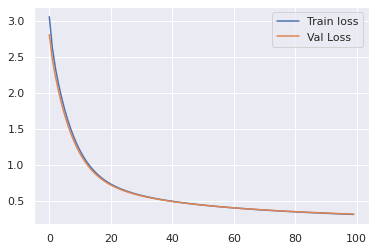

In [61]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

# **El gráfico siguiente muestra el comportamiento de accuracy**

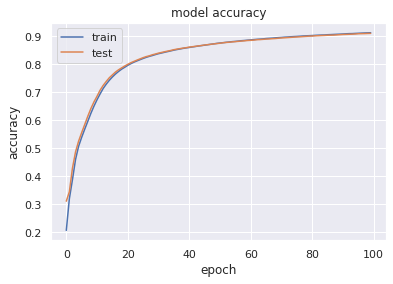

In [62]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [66]:
for dato in range(1,10,1):
  prediction = model.predict(X_train)
  classes_x=np.argmax(prediction,axis=1)
  print("Predicción:", class_names[classes_x[dato]])
  print("Clase Real:", class_names[y_test[dato]])
  print("\n")

Predicción: N
Clase Real: S


Predicción: M
Clase Real: B


Predicción: S
Clase Real: N


Predicción: N
Clase Real: O


Predicción: T
Clase Real: S


Predicción: T
Clase Real: P


Predicción: H
Clase Real: O


Predicción: E
Clase Real: W


Predicción: S
Clase Real: U




# **Datos Test**

In [67]:
filename = 'test.csv'    

df2 = CargaDatos(filename)
df2.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df2

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74485,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74486,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74487,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df2.drop(columns=['letter']).values / 255
y= df2['letter'].values

In [70]:
X_train = pca.fit_transform(X)
y_test  = y

In [71]:
prediction = model.predict(X_train)

In [72]:
classes_x=np.argmax(prediction,axis=1)

# **Prueba del modelo con datos de Test**

In [73]:
for dato in range(1,50,1):
  print("Predicción:", class_names[classes_x[dato]])
  print("Clase Real:", class_names[y_test[dato]])
  print("\n")

Predicción: B
Clase Real: B


Predicción: H
Clase Real: H


Predicción: P
Clase Real: K


Predicción: O
Clase Real: U


Predicción: A
Clase Real: A


Predicción: Y
Clase Real: Y


Predicción: O
Clase Real: O


Predicción: K
Clase Real: P


Predicción: Y
Clase Real: Y


Predicción: O
Clase Real: E


Predicción: R
Clase Real: R


Predicción: D
Clase Real: L


Predicción: G
Clase Real: G


Predicción: U
Clase Real: U


Predicción: J
Clase Real: T


Predicción: O
Clase Real: O


Predicción: C
Clase Real: C


Predicción: R
Clase Real: P


Predicción: Z
Clase Real: Z


Predicción: E
Clase Real: P


Predicción: U
Clase Real: J


Predicción: C
Clase Real: O


Predicción: L
Clase Real: D


Predicción: P
Clase Real: U


Predicción: O
Clase Real: O


Predicción: U
Clase Real: U


Predicción: A
Clase Real: A


Predicción: S
Clase Real: S


Predicción: C
Clase Real: C


Predicción: Q
Clase Real: Q


Predicción: O
Clase Real: O


Predicción: S
Clase Real: S


Predicción: R
Clase Real: P


Predicción